In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns



In [2]:
# Set the desired directory path
new_directory = '/Users/ariel/Desktop/Data Science/ITC/Finalproject'
# Change the current directory
os.chdir(new_directory)

In [3]:
# Set the directory path where the CSV files are located
directory = 'Finished_Dataframes/asl_alphabet_train (copy)'

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Extract the letters before ".csv" as the value for the "letter" column
        letter = filename[:-4]  # Remove the ".csv" extension
        letter = letter.split('_')[-1]  # Extract the last part of the file name


        # Read each CSV file into a DataFrame
        file_path = os.path.join(directory, filename)

        try:
            data = pd.read_csv(file_path)
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {filename}")
            continue

        # Check if the DataFrame has any columns
        if len(data.columns) == 0:
            print(f"Skipping file with no columns: {filename}")
            continue

        # Add the "letter" column to the DataFrame
        data['letter'] = letter

        # Append the data to the combined DataFrame
        combined_data = pd.concat([combined_data, data], ignore_index=True)

In [4]:
display(combined_data.head())
display(combined_data.tail())
combined_data.shape

,image_name,x_left_0,x_left_1,x_left_2,x_left_3,x_left_4,x_left_5,x_left_6,x_left_7,x_left_8,...,z_left_12,z_left_13,z_left_14,z_left_15,z_left_16,z_left_17,z_left_18,z_left_19,z_left_20,letter
0,1.jpg,0.436901,0.560327,0.623183,0.652389,0.667820,0.610240,0.612678,0.604714,0.601774,...,0.544981,0.468420,0.456650,0.480442,0.489724,0.404517,0.387704,0.411648,0.427437,A
1,10.jpg,0.364472,0.454112,0.513072,0.535646,0.575197,0.502481,0.496711,0.470052,0.455387,...,0.411181,0.381722,0.377500,0.368503,0.367080,0.329274,0.328056,0.330574,0.338363,A
2,100.jpg,0.428278,0.484400,0.532799,0.545799,0.562799,0.510446,0.529611,0.514417,0.500575,...,0.472744,0.450318,0.469359,0.455670,0.447325,0.417534,0.438880,0.432223,0.426714,A
3,101.jpg,0.424784,0.482184,0.529932,0.542437,0.560190,0.509475,0.526530,0.512579,0.499763,...,0.473506,0.448614,0.467394,0.454470,0.446572,0.415342,0.436482,0.430714,0.425438,A
4,102.jpg,0.417284,0.475789,0.523456,0.536454,0.554764,0.502471,0.521018,0.506834,0.493592,...,0.466224,0.441168,0.460363,0.448102,0.440266,0.407748,0.430234,0.425070,0.419382,A


,image_name,x_left_0,x_left_1,x_left_2,x_left_3,x_left_4,x_left_5,x_left_6,x_left_7,x_left_8,...,z_left_12,z_left_13,z_left_14,z_left_15,z_left_16,z_left_17,z_left_18,z_left_19,z_left_20,letter
190104,z_9_rotate_5.jpeg,0.466576,0.597058,0.672862,0.600975,0.477794,0.573439,0.544155,0.516342,0.473411,...,0.535100,0.387651,0.359161,0.434982,0.454750,0.300129,0.281499,0.357470,0.372807,Z
190105,z_9_rotate_6.jpeg,0.526129,0.639883,0.683881,0.586075,0.453771,0.551871,0.490613,0.448365,0.392820,...,0.540006,0.389083,0.346327,0.449532,0.474611,0.316115,0.284796,0.378245,0.400242,Z
190106,z_9_rotate_7.jpeg,0.587329,0.683201,0.692049,0.568673,0.433657,0.531856,0.442061,0.384956,0.316810,...,0.548469,0.394106,0.338944,0.467591,0.498177,0.335363,0.296062,0.404499,0.433281,Z
190107,z_9_rotate_8.jpeg,0.642814,0.709251,0.687248,0.545276,0.412934,0.508125,0.393595,0.322971,0.240407,...,0.552384,0.402017,0.335572,0.484449,0.518299,0.362037,0.309503,0.429401,0.463636,Z
190108,z_9_rotate_9.jpeg,0.696698,0.735234,0.683366,0.523456,0.396018,0.486227,0.351410,0.268797,0.177349,...,0.554638,0.411812,0.336857,0.500710,0.540241,0.390722,0.331458,0.458383,0.498196,Z


(190109, 65)

In [5]:
# group the data by letter and add summaries for each column
data_summary = combined_data.drop('image_name', axis=1)
data_summary = data_summary.groupby('letter').agg(['min', 'max', 'mean', 'median', 'std','count']).T
display(data_summary)

letter                      A            B            C            D   
x_left_0  min        0.104815     0.054059    -0.114567     0.089631  \
          max        0.846801     0.854074     0.916003     0.832121   
          mean       0.492540     0.486392     0.358932     0.453071   
          median     0.500086     0.480024     0.348160     0.454246   
          std        0.140338     0.149800     0.167316     0.145861   
...                       ...          ...          ...          ...   
z_left_20 max        0.984723     0.998247     0.981956     0.997767   
          mean       0.448409     0.449756     0.619522     0.571944   
          median     0.445758     0.436050     0.643382     0.569649   
          std        0.161263     0.175506     0.164904     0.169343   
          count   7614.000000  7996.000000  6717.000000  7080.000000   

letter                      E            F            G            H   
x_left_0  min        0.067352     0.107885    -0.075493    -0.015243  \
          max        0.874660     0.891856     1.063866     1.099166   
          mean       0.482351     0.555868     0.628324     0.717812   
          median     0.483156     0.562687     0.658557     0.753600   
          std        0.147970     0.132085     0.196299     0.185457   
...                       ...          ...          ...          ...   
z_left_20 max        0.873890     1.012119     0.953928     0.985979   
          mean       0.441576     0.365869     0.512380     0.611706   
          median     0.440828     0.336826     0.510665     0.627194   
          std        0.160085     0.179728     0.145062     0.133827   
          count   6829.000000  7909.000000  7132.000000  6833.000000   

letter                      I            J  ...            T            U   
x_left_0  min        0.112710    -0.010912  ...     0.071036     0.075830  \
          max        0.898940     1.070949  ...     0.860514     0.894404   
          mean       0.528486     0.650300  ...     0.455616     0.515189   
          median     0.521470     0.665881  ...     0.462237     0.515474   
          std        0.146961     0.166079  ...     0.143540     0.170806   
...                       ...          ...  ...          ...          ...   
z_left_20 max        0.934597     0.940406  ...     0.912636     0.967205   
          mean       0.438751     0.270091  ...     0.422836     0.485874   
          median     0.432199     0.229045  ...     0.396498     0.479580   
          std        0.189921     0.212883  ...     0.172452     0.179725   
          count   7112.000000  6760.000000  ...  7416.000000  7202.000000   

letter                      V            W            X            Y   
x_left_0  min        0.082344     0.074724     0.106899     0.029245  \
          max        0.927302     0.891044     0.889892     0.865506   
          mean       0.483655     0.500468     0.503352     0.511248   
          median     0.466406     0.500527     0.493802     0.504598   
          std        0.165900     0.171659     0.142947     0.139117   
...                       ...          ...          ...          ...   
z_left_20 max        1.002702     1.025034     0.953951     1.044381   
          mean       0.433700     0.461667     0.449385     0.353454   
          median     0.408557     0.452275     0.429008     0.304833   
          std        0.179964     0.192702     0.166060     0.256312   
          count   7076.000000  7395.000000  7543.000000  7519.000000   

letter                      Z          del   nothing        space  
x_left_0  min        0.052652     0.071255  0.183644    -0.056390  
          max        0.932959     0.935208  0.197046     1.040116  
          mean       0.412881     0.609600  0.192119     0.567312  
          median     0.407266     0.632016  0.195668     0.570878  
          std        0.168795     0.165134  0.007372     0.180318  
...                       ...          ...       ...          ...  
z_le

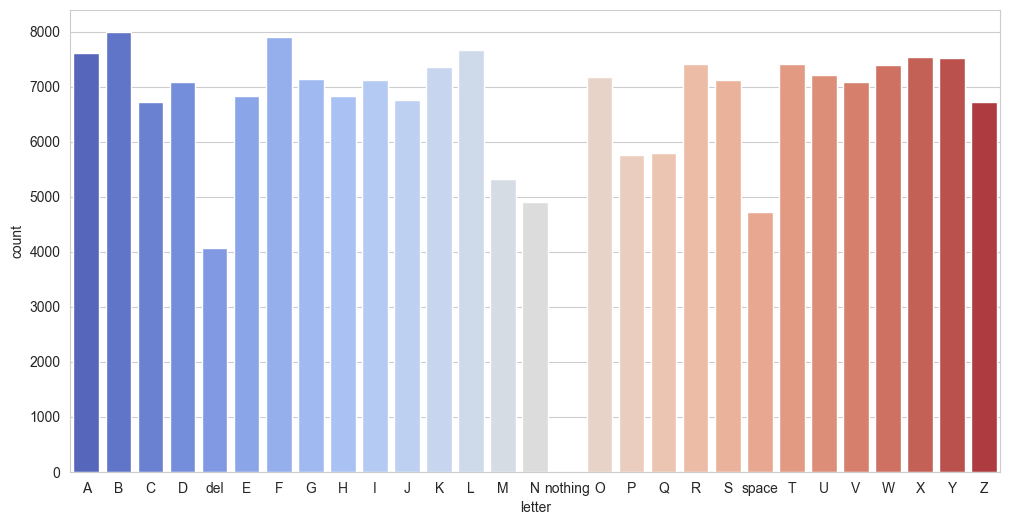

In [6]:
# plot the data counts for each letter
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x='letter', data=combined_data, palette='coolwarm')
plt.show()

In [7]:
# look at the first image coordinates
display(combined_data.iloc[1].T)

image_name      10.jpg
x_left_0      0.364472
x_left_1      0.454112
x_left_2      0.513072
x_left_3      0.535646
                ...   
z_left_17     0.329274
z_left_18     0.328056
z_left_19     0.330574
z_left_20     0.338363
letter               A
Name: 1, Length: 65, dtype: object

In [8]:
# landmarks_df = combined_data.iloc[1].to_frame()
# landmarks_df = landmarks_df.T
# # landmarks_df.index
# landmarks_df

,image_name,x_left_0,x_left_1,x_left_2,x_left_3,x_left_4,x_left_5,x_left_6,x_left_7,x_left_8,...,z_left_12,z_left_13,z_left_14,z_left_15,z_left_16,z_left_17,z_left_18,z_left_19,z_left_20,letter
1,10.jpg,0.364472,0.454112,0.513072,0.535646,0.575197,0.502481,0.496711,0.470052,0.455387,...,0.411181,0.381722,0.3775,0.368503,0.36708,0.329274,0.328056,0.330574,0.338363,A


In [17]:
# # Assuming the landmarks are stored in a pandas DataFrame called "landmarks_df"
# # Convert the x, y, z coordinates from normalized (0-1) to pixel coordinates
# image_height, image_width, _ = image.shape
# for i in range(21):
#     landmarks_df[f'x_pixel_{i}'] = landmarks_df[f'x_left_{i}']* image_width
#     landmarks_df[f'y_pixel_{i}'] = landmarks_df[f'y_left_{i}'] * image_height
#     landmarks_df[f'z_pixel_{i}'] = landmarks_df[f'z_left_{i}'] * image_width
#
# # Create a copy of the image to draw the landmarks
# image_with_landmarks = image.copy()
#
# # Iterate over the landmarks and draw circles or points on the image
# for _, landmark in landmarks_df.iterrows():
#     for i in range(21):
#         x, y, z = landmark[f'x_pixel_{i}'], landmark[f'y_pixel_{i}'], landmark[f'z_pixel_{i}']
#         cv2.circle(image_with_landmarks, (int(x), int(y)), 5, (0, 255, 0), -1)
#         cv2.putText(image_with_landmarks, f'{z:.2f}', (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
#
# # Display the image with landmarks using matplotlib
# plt.imshow(cv2.cvtColor(image_with_landmarks, cv2.COLOR_BGR2RGB))
# plt.title('Image with Landmarks')
# plt.axis('off')
# plt.show()

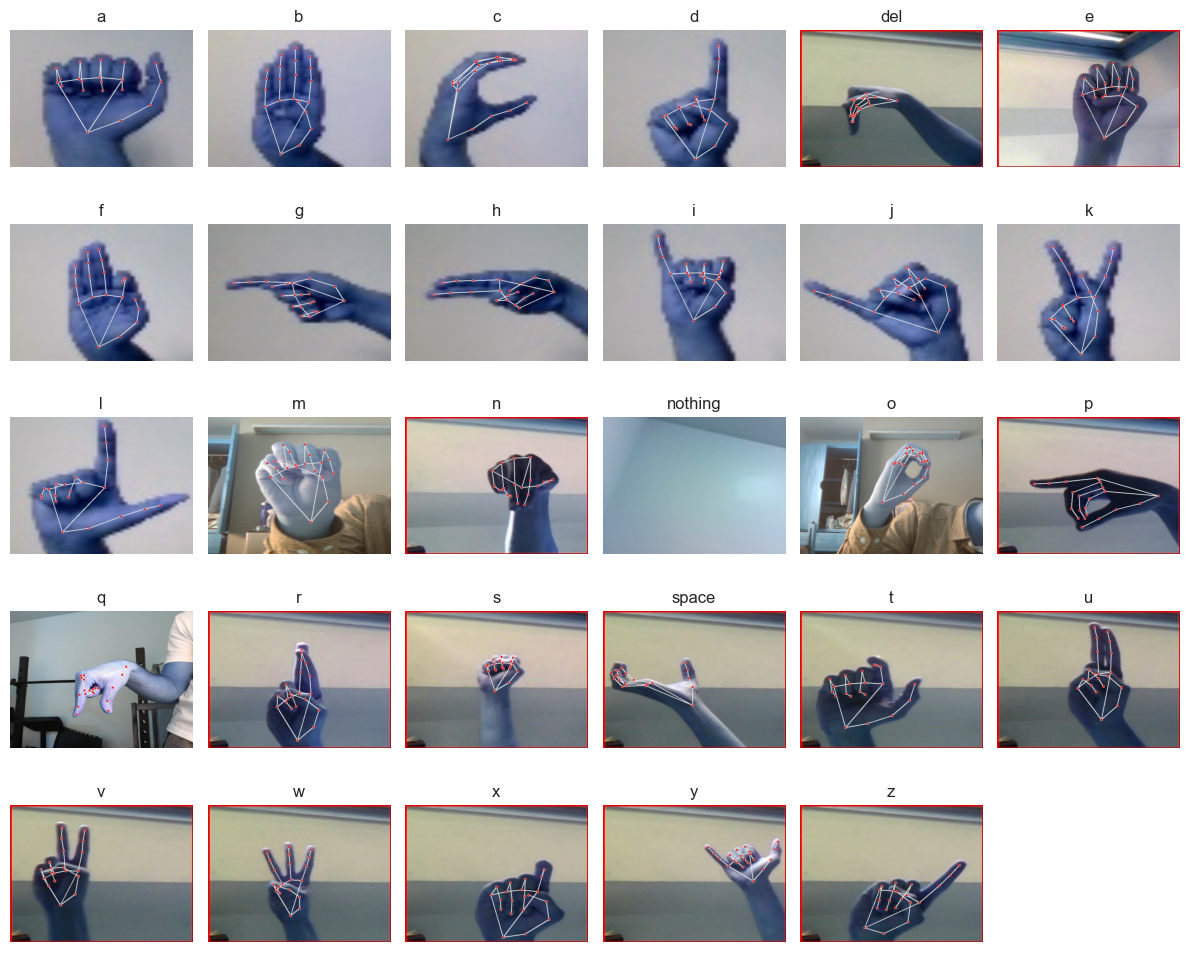

In [9]:
# Path to the folder containing the images
folder_path = 'images with landmarks'

# Create a subplot grid for displaying multiple images
num_images = 29
num_rows = 5
num_cols = 6
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Iterate over all files in the folder
for i, filename in enumerate(sorted(os.listdir(folder_path))):
    if i >= num_images or not (filename.endswith('.jpg') or filename.endswith('.png')):
        continue

    # Read the image
    image_path = os.path.join(folder_path, filename)
    image = mpimg.imread(image_path)

    # Calculate the subplot index
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Extract the title from the filename
    title = filename.split('.')[0]  # Remove the extension
    title = title.split('_')[-1]  # Extract the last part of the file name

    # Display the image in the subplot
    axs[row_idx, col_idx].imshow(image)
    axs[row_idx, col_idx].axis('off')
    axs[row_idx, col_idx].set_title(title)

# Remove any empty subplots
if i < (num_rows * num_cols - 1):
    for j in range(i + 1, num_rows * num_cols):
        axs[j // num_cols, j % num_cols].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()